In [2]:
from collections import Counter
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [6]:
with open("data/dict_all_annotations_1_10channels.json") as file:
    annotations = json.load(file)

In [4]:
import json

In [20]:
def plot_hist_length_actions(annotations, channel=None):
    list_duration = []
    for miniclip in annotations.keys():
        if channel:
            if channel not in miniclip:
                continue
        list_action_label = annotations[miniclip]
        for [action, label] in list_action_label:
            if label != ["not visible"]:
                [time_s, time_e] = label
                if time_e == time_s == -1:
                    rounded_duration = "-1"
                else:
                    action_duration = int(time_e - time_s)
                    # 5 -> 0; 6 -> 10
                    rounded_duration = str(int(round(action_duration, -1)))
                if int(rounded_duration) < 0:
                    print(miniclip, action)
                list_duration.append(rounded_duration)

    counter = Counter(list_duration)
    # counter = counter.most_common()
    counter = sorted(counter.items())
    labels, values = zip(*counter)
    for l in ['-1', '0', '10', '20', '30', '40', '50', '60']:
#     for l in ['0', '10', '20', '30', '40', '50', '60']:
        if l not in labels:
            counter.append((l, 0))

    # counter = sorted(counter.items())
    print(counter)
    labels, values = zip(*counter)
    indexes = np.arange(len(labels))
    width = 1

    # plt.bar(indexes, values, width, color=['yellow', 'red', 'green', 'blue', 'cyan', "pink", "orange", "purple"])
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.ylabel('count', fontsize=18)
    plt.xlabel('rounded seconds', fontsize=16)
    plt.show()

[('0', 1136), ('10', 1200), ('20', 475), ('30', 157), ('40', 72), ('50', 69), ('60', 30), ('-1', 0)]


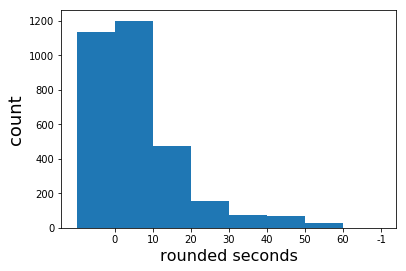

In [21]:
plot_hist_length_actions(annotations)

In [36]:
with open("data/results/dict_predicted_GT_1p0.json") as file:
    predicted_GT = json.load(file)

In [37]:
plot_hist_length_actions(predicted_GT)

TypeError: 'int' object is not iterable

In [38]:
def change_format(predicted):
    new_format_dict = {}
   
    for video_action in predicted.keys():
        video, action = video_action.split(", ")
        if video not in new_format_dict.keys():
            new_format_dict[video] = []
            time = [float(i) for i in predicted[video_action][0]]
            new_format_dict[video].append([action, time])

    return new_format_dict


In [39]:
predicted_GT = change_format(predicted_GT)

In [40]:
with open("data/annotations/annotations1p0.json") as file:
    annotations_1p0 = json.load(file)
annotations_1p0 = change_format(annotations_1p0)

ValueError: could not convert string to float: 'n'